1   0.826779
2   0.826779
3   0.826779
4   0.826779
5   0.826779
6   0.705758
7   0.705758
8   0.705758
9   0.696816
10   0.603319
11   0.603319
12   0.603319
13   0.603319
14   0.603319
15   0.603319
16   0.603319
17   0.603319
18   0.603319
19   0.603319
20   0.603319
21   0.561535
22   0.469798
23   0.469798
24   0.469798
25   0.469798
26   0.469798
27   0.469798
28   0.469798
29   0.469798
30   0.469798
31   0.469798
32   0.344590
33   0.344590
34   0.344590
35   0.344590
36   0.344590
37   0.344590
38   0.344590
39   0.344590
40   0.344590
41   0.344590
42   0.344590
43   0.326769
44   0.326769
45   0.326769
46   0.326769
47   0.326769
48   0.326769
49   0.326769
50   0.326769
51   0.155401
52   0.155401
53   0.155401
54   0.155401
55   0.155401
56   0.155401
57   0.155401
58   0.155401
59   0.155401
60   0.155401
61   0.155401
62   0.155401
63   0.155401
64   0.155401
65   0.155401
66   0.155401
67   0.155401
68   0.155401
69   0.155401
70   0.155401
71   0.155401
72   0.155401
7

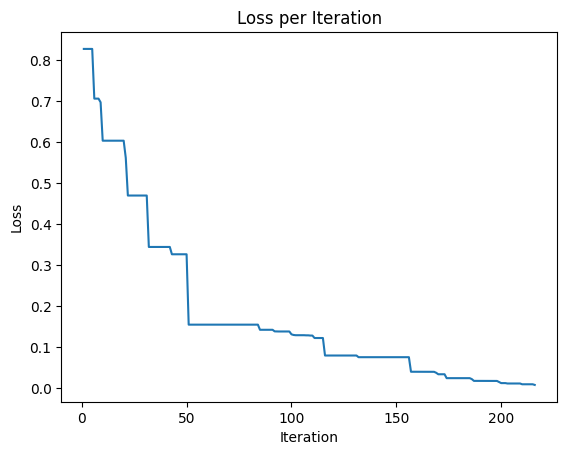

population  1
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  2
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  3
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  4
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  5
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  6
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  7
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Output: 0.0
population  8
 Input: (0, 0), Output: 0.0
 Input: (1, 0), Output: 1.0
 Input: (0, 1), Output: 1.0
 Input: (1, 1), Outp

In [1]:
import numpy as np
import random
import operator
import matplotlib.pyplot as plt

try:
    import cPickle as pickle
except ImportError:
    import pickle

# no. of weights = 9
# no. of genes in 1 chromosome = 5*9 = 45
# consider adding localisation

pop = 50
parent_num = 30

def sigmoid(x):
	return 1.0/(1.0+np.exp(-x))

def feedforward(inp1,inp2,arr1):
	arr = chromo_2_weight(arr1)
	l1 = sigmoid(arr[0]+ (inp1*arr[1]) + (inp2*arr[2]))
	l2 = sigmoid(arr[3]+ (inp1*arr[4]) + (inp2*arr[5]))
	out = sigmoid(arr[6] + (l1*arr[7]) + (l2*arr[8]))
	return out

def fitness(arr):
	f1 = feedforward(0.0,0.0,arr)
	f2 = feedforward(0.0,1.0,arr)
	f3 = feedforward(1.0,0.0,arr)
	f4 = feedforward(1.0,1.0,arr)
	f = (f1-0.0)**2 + (f2-1.0)**2 + (f3-1.0)**2 + (f4-0.0)**2
	f = f/4
	f = np.sqrt(f)
	f = 1/f
	return f

def mutate_weights(arr,mut):
	for j in range(0,mut):
		i = random.randint(0,len(arr)-1)
		a = random.randint(0,9)
		arr[i] = a
	return arr

def chromo_2_weight(arr):
	weight = []
	for i in range(0,9):
		ind = 5*i
		mul = 1.0
		if arr[ind] >= 5:
			mul = -1.0
		w = ((arr[ind+1]*1000.0 + arr[ind+2]*100.0 + arr[ind+3]*10.0 + arr[ind+4])*mul)/1000.0
		weight.append(w)
	weight = np.asarray(weight)
	return weight

def n_point_crossover(n,arr1,arr2):
	points = random.sample(range(1,len(arr1)-1),n)
	child = []
	init = 0
	points = sorted(points)
	#print points
	for i in range(0,len(points)):
		ch = random.randint(0,1)
		if ch == 0:
			for j in range(init,points[i]):
				child.append(arr1[j])
		else :
			for j in range(init,points[i]):
				child.append(arr2[j])
		init = points[i]
	ch = random.randint(0,1)
	if ch == 0:
		for j in range(init,len(arr1)):
			child.append(arr1[j])
	else :
		for j in range(init,len(arr2)):
			child.append(arr2[j])
	child = np.asarray(child)
	return child

def form_mating_pool(parent_pop,population):
	# stochastic universal sampling
	segments = []
	total = 0
	for i in range(0,len(population)):
		total = total + fitness(population[i])
		segments.append(total)
	segments = np.asarray(segments)
	dist = total/parent_pop
	pointer = random.uniform(0.0,dist)
	parents = []
	for i in range(0,parent_pop):
		ind = 0
		par = pointer + i*dist
		for j in range(1,len(segments)):
			if par<segments[j]:
				ind = j
				break
		parents.append(population[ind])
	parents = np.asarray(parents)
	return parents

def form_next_gen(parents,population):
	next_gen = []
	temp = []
	for j in range(0,2):
		random.shuffle(parents)
		for i in range(0, len(parents)//2):
			c1 = mutate_weights(parents[2*i],7)
			c2 = mutate_weights(parents[(2*i)+1],7)
			elem = []
			c3 = n_point_crossover(2,c1,c2)
			f = fitness(c3)
			elem.append(f)
			elem.append(c3)
			temp.append(elem)
	for i in range(0,len(population)):
		f = fitness(population[i])
		elem = []
		elem.append(f)
		elem.append(population[i])
		temp.append(elem)
	#elitist approach
	temp = sorted(temp,key=operator.itemgetter(0),reverse=True)
	for i in range(0,pop):
		next_gen.append(temp[i][1])
	return next_gen,temp[0][0]

population = []
for i in range(0,pop):
	a = np.random.randint(11,size=45) - 5
	population.append(a)

population1 = population
population2 = population
population3 = population
population4 = population
population5 = population
population6 = population
population7 = population

loss = 4.0
itr = 0
iteration_list1 = []
loss_list1 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population1)
    population1, fit = form_next_gen(parents, population1)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list1.append(itr)
    loss_list1.append(loss)
    print("%d   %f" % (itr, loss))

# Plot the loss per iteration
plt.plot(iteration_list1, loss_list1)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration')
plt.show()

for i in range(len(population1)):
		print("population ", format(i+1))
		for input_pair in [(0, 0), (1, 0), (0, 1), (1, 1)]:
				input1, input2 = input_pair
				output = feedforward(input1, input2, population1[i])  # Assuming you want to use the best individual from the population
				print(" Input: ({}, {}), Output: {}".format( input1, input2, np.round(output)))

In [2]:
def fitness(arr):
    f1 = feedforward(0.0, 0.0, arr)
    f2 = feedforward(0.0, 1.0, arr)
    f3 = feedforward(1.0, 0.0, arr)
    f4 = feedforward(1.0, 1.0, arr)

    # Define your new loss function here
    # For example, absolute difference from the target values
    f = np.abs(f1 - 0.0) + np.abs(f2 - 1.0) + np.abs(f3 - 1.0) + np.abs(f4 - 0.0)

    return 1 / f  # Assuming you want to maximize fitness

loss = 4.0
itr = 0
iteration_list2 = []
loss_list2 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population2)
    population2, fit = form_next_gen(parents, population2)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list2.append(itr)
    loss_list2.append(loss)


In [3]:
def fitness(arr):
    target_outputs = np.array([0.0, 1.0, 1.0, 0.0])  # Assuming binary classification targets

    # Calculate predicted outputs
    outputs = np.array([feedforward(0.0, 0.0, arr), feedforward(0.0, 1.0, arr),
                        feedforward(1.0, 0.0, arr), feedforward(1.0, 1.0, arr)])

    # Avoid log(0) issues by adding a small epsilon
    epsilon = 1e-15
    outputs = np.clip(outputs, epsilon, 1 - epsilon)

    # Calculate cross-entropy loss
    loss = -np.sum(target_outputs * np.log(outputs) + (1 - target_outputs) * np.log(1 - outputs))

    return 1 / loss  # Assuming you want to maximize fitness


loss = 4.0
itr = 0
iteration_list3 = []
loss_list3 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population3)
    population3, fit = form_next_gen(parents, population3)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list3.append(itr)
    loss_list3.append(loss)


In [4]:
def huber_loss(arr, delta=1.0):
    f1 = feedforward(0.0, 0.0, arr)
    f2 = feedforward(0.0, 1.0, arr)
    f3 = feedforward(1.0, 0.0, arr)
    f4 = feedforward(1.0, 1.0, arr)

    # Define Huber loss for each prediction
    def huber_single(prediction, target, delta):
        error = prediction - target
        if np.abs(error) <= delta:
            return 0.5 * error**2
        else:
            return delta * (np.abs(error) - 0.5 * delta)

    # Calculate Huber loss for all predictions
    loss = huber_single(f1, 0.0, delta) + huber_single(f2, 1.0, delta) + \
           huber_single(f3, 1.0, delta) + huber_single(f4, 0.0, delta)

    return 1 / loss  # Assuming you want to maximize fitness
loss = 4.0
itr = 0
iteration_list4 = []
loss_list4 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population4)
    population4, fit = form_next_gen(parents, population4)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list4.append(itr)
    loss_list4.append(loss)



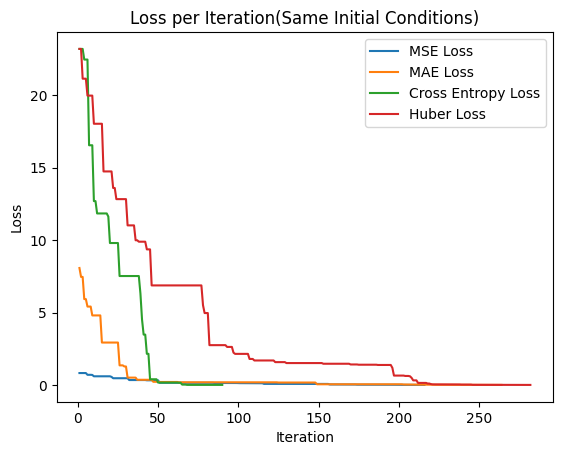

In [5]:
import matplotlib.pyplot as plt

# Assuming you have iteration_list1, loss_list1, iteration_list2, loss_list2, etc.

# Plotting MSE Loss
plt.plot(iteration_list1, loss_list1, label='MSE Loss')

# Plotting MAE Loss
plt.plot(iteration_list2, loss_list2, label='MAE Loss')

# Plotting Cross Entropy Loss
plt.plot(iteration_list3, loss_list3, label='Cross Entropy Loss')

# Plotting Huber Loss
plt.plot(iteration_list4, loss_list4, label='Huber Loss')

# Adding labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration(Same Initial Conditions)')

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [6]:
def sigmoid(x):
    return (1+np.tanh(x))/2

loss = 4.0
itr = 0
iteration_list5 = []
loss_list5 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population5)
    population5, fit = form_next_gen(parents, population5)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list5.append(itr)
    loss_list5.append(loss)

import scipy.special

def custom_activation(x):
    return (1+scipy.special.erf(np.sqrt(np.pi) / 2 * x))/2
loss = 4.0
itr = 0
iteration_list6 = []
loss_list6 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population6)
    population6, fit = form_next_gen(parents, population6)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list6.append(itr)
    loss_list6.append(loss)

def sigmoid(x):
    return (1+x/np.sqrt(x**2+1))/2

loss = 4.0
itr = 0
iteration_list7 = []
loss_list7 = []

while loss > 0.01:
    itr = itr + 1
    parents = form_mating_pool(parent_num, population7)
    population7, fit = form_next_gen(parents, population7)
    fit = 1 / fit
    fit = fit ** 2
    loss = 4.0 * fit
    iteration_list7.append(itr)
    loss_list7.append(loss)

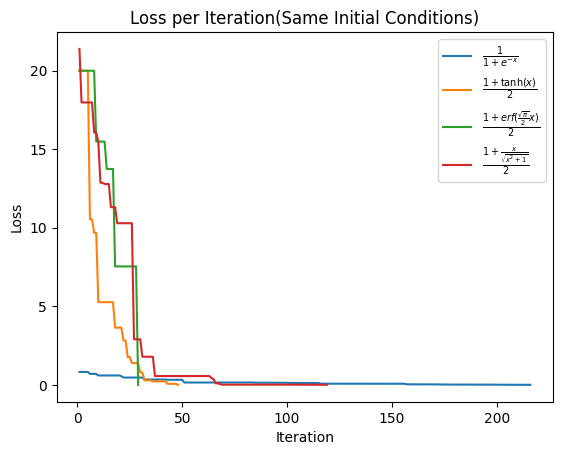

In [11]:
# Plot the loss per iteration with legends
plt.plot(iteration_list1, loss_list1, label=r'$\frac{1}{1+e^{-x}}$')
plt.plot(iteration_list5, loss_list5, label=r'$\frac{1+\tanh(x)}{2}$')
plt.plot(iteration_list6, loss_list6, label=r'$\frac{1+erf(\frac{\sqrt{\pi}}{2}x)}{2}$')
plt.plot(iteration_list7, loss_list7, label=r'$\frac{1+\frac{x}{\sqrt{x^2+1}}}{2}$')

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss per Iteration(Same Initial Conditions)')
plt.legend()
plt.show()